## Running SAM

Below, is a quickstart tutorial to analyze scRNA-seq data using SAM and visualize results. We emphasize that SAM is not meant to be a black box. All its attributes are easily accessible and can be manipulated, visualized, and saved/exported at will. For a deeper exploration of all the attributes contained within a SAM object, feel free to explore the documentation in the source code 'SAM.py'.

In [1]:
from SAM import SAM

Next, we initialize the SAM object. Here, we shave the option of passing in a preloaded Pandas DataFrame. For now, we will instead load the data from a file.

In [2]:
sam = SAM()

'load_data_from_file' loads the expression matrix from a tabular file and filters the data. SAM expects a data table of genes as rows and cells as columns. The first row of the table should be cell identifiers and the first column of the table should be gene identifiers.

Let's use all default parameters for now.

In [3]:
sam.load_data_from_file('../example_data/GSE74596_data.csv.gz')

We also have cell annotations we can load,

In [4]:
sam.load_annotations('../example_data/GSE74596_ann.csv')

To run SAM using default parameters,

In [5]:
sam.run()

RUNNING SAM
Iteration: 0, Convergence: 0.9938371464864115
Iteration: 1, Convergence: 0.9504529842136674
Iteration: 2, Convergence: 0.06106844051183846
Iteration: 3, Convergence: 0.0015212169499309036
Iteration: 4, Convergence: 0.0003024643082256695
Iteration: 5, Convergence: 0.0001294714321042889
Iteration: 6, Convergence: 6.416398079367447e-05
Iteration: 7, Convergence: 7.018347595033614e-05
Iteration: 8, Convergence: 8.499611892198722e-05
Iteration: 9, Convergence: 5.0472636931475634e-05
Iteration: 10, Convergence: 4.900137091767842e-05
Iteration: 11, Convergence: 6.137808922068722e-05
Iteration: 12, Convergence: 5.332382191536311e-05
Iteration: 13, Convergence: 5.039799226225217e-05
Iteration: 14, Convergence: 4.2135841090806814e-05
Computing the t-SNE embedding...
Elapsed time: 9.312542915344238 seconds


## Visualization

To visualize the t-SNE embedding:

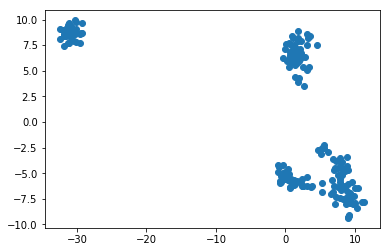

In [6]:
sam.scatter()

To visualize the t-SNE embedding with our ground truth annotations overlaid:

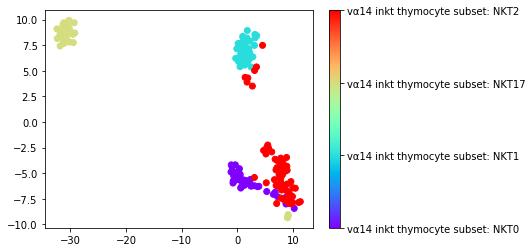

In [7]:
sam.scatter(c=sam.ann)

The ranked genes are stored in 'sam.ranked_genes'. Printing the top 10 ranked_genes,

In [8]:
print( sam.ranked_genes[:10] )

['ENSMUSG00000094777.2' 'ENSMUSG00000027715.9' 'ENSMUSG00000026573.7'
 'ENSMUSG00000014453.3' 'ENSMUSG00000032218.6' 'ENSMUSG00000069272.5'
 'ENSMUSG00000067613.5' 'ENSMUSG00000044734.15' 'ENSMUSG00000041431.16'
 'ENSMUSG00000027306.15']


If we want to display the gene expression pattern of the number one ranked gene, we can use the following:

(Note that all valid keyword arguments for 'matplotlib.pyplot.scatter' can be used in any of the plotting functions).

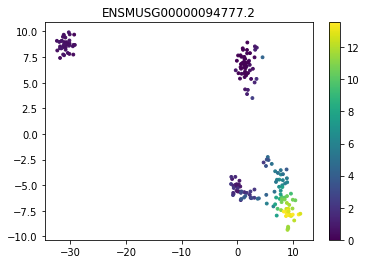

In [9]:
sam.show_gene_expression( sam.ranked_genes[0], s=8, cmap='viridis' )

To display the top 3 genes,

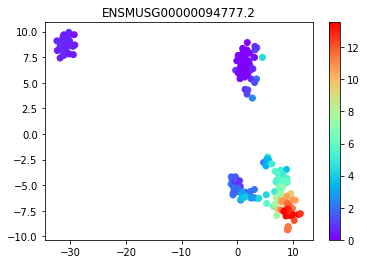

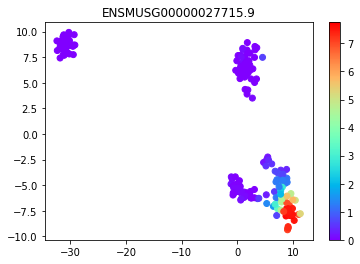

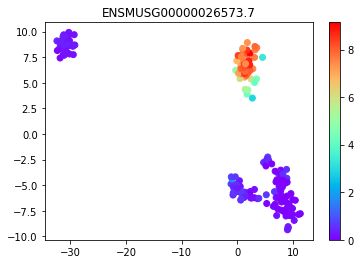

In [10]:
sam.plot_top_genes(n_genes=3)

To display orthogonal (or roughly orthogonal) gene expression patterns:

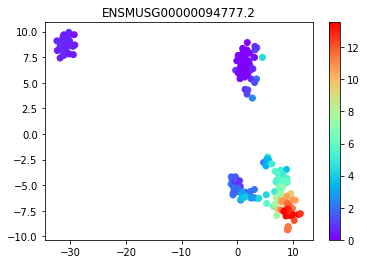

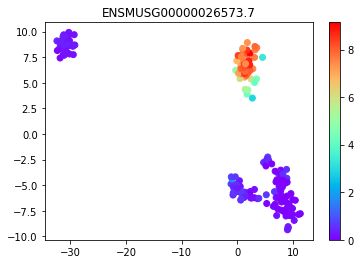

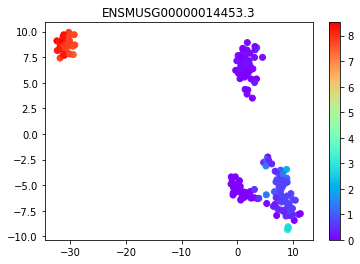

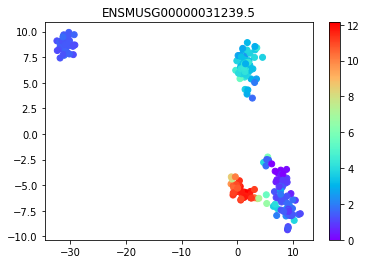

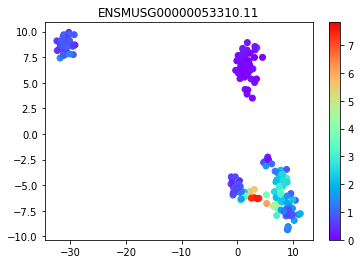

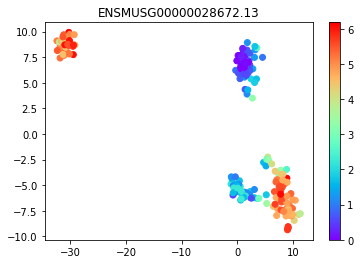

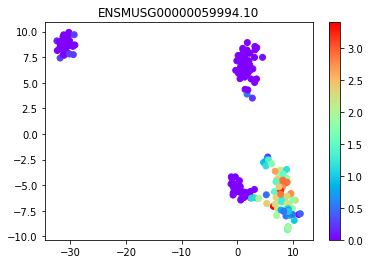

In [11]:
sam.plot_correlated_groups()

To display genes correlated with a given gene:

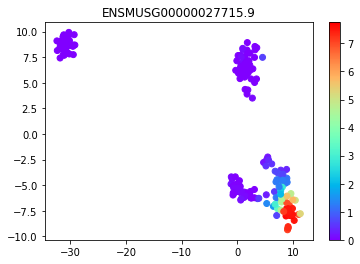

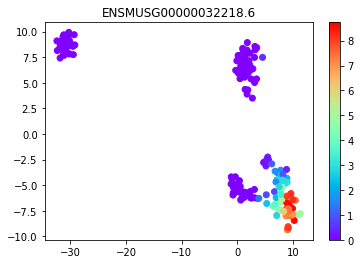

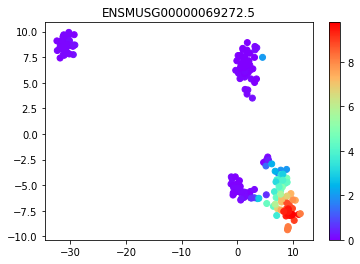

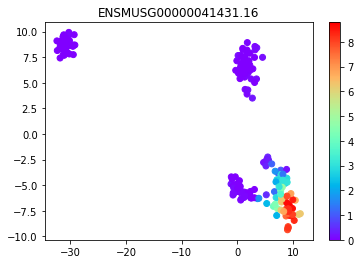

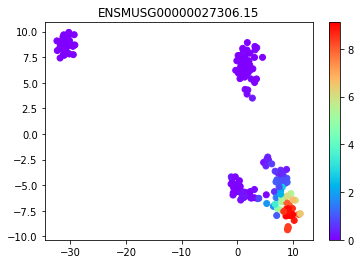

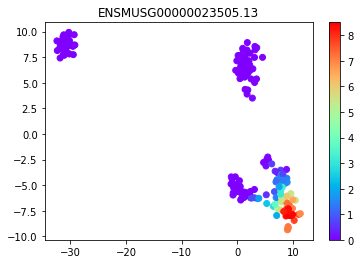

In [12]:
sam.plot_correlated_genes( sam.ranked_genes[0] , n_genes=6 );

## Input/Output

To save the SAM object and all its contents into a Pickle file:

In [13]:
sam.save('example_save',dirname = 'output_directory')

To load a saved SAM object:

In [14]:
sam=SAM(''); #create an empty SAM object
sam.load('output_directory/example_save.p')

Individual attributes within the SAM object, such as the cell-to-cell distance matrix, the list of ranked genes, the nearest neighbor matrix, the rescaled expression matrix, etc., can be manually saved/exported using any desired method.

See below for a list of all attributes stored in SAM after running the analysis:

In [15]:
list(sam.__dict__.keys())

['dataset',
 'ann',
 'k',
 'distance',
 'analysis_performed',
 'filtered_dataset',
 'num_expressed_genes',
 'D',
 'gene_names',
 'cell_names',
 'ann_int',
 'D_avg',
 'weighted_data',
 'D_sub',
 'weighted_sub',
 'wPCA_data',
 'pca',
 'dist',
 'indices',
 'nnm_adj',
 'weights',
 'ranked_genes',
 'dt',
 'gene_groups',
 'geneID_groups']

## After initializing the SAM object

__dataset__: The preloaded expression data (or None if no data passed into the constructor).

__ann__: The preloaded annotations (or None if no annotations passed into the constructor).

__k__: The number of nearest neighbors to identify for each cell when constructing the nearest neighbor graph.

__distance__: The distance metric used when constructing the cell-to-cell distance matrix.

## After loading the expression data

__filtered_dataset__: A Pandas DataFrame containing the filtered data (cells x genes).

__num_expressed_genes__: The number of expressed genes in each cell.

__D__: The numpy array version of 'filtered_dataset' (equivalent to filtered_dataset.values).

__gene_names__: A vector of the gene names (equivalent to filtered_dataset.columns).

__cell_names__: A vector of the cell names (equivalent to filtered_dataset.index).

## After loading the cell annotations

__ann__: A vector of cell annotations if they were provided.

__ann_int__: A vector of cell annotations converted to integers.

## After running the SAM algorithm

__D_avg__: The k-nearest-neighbor-averaged expression data.

__weighted_data__: The rescaled expression data.

__D_sub__: If the 'n_genes' parameter is set, D_sub is the subsetted gene expression matrix. Otherwise, it is equal to 'D'.

__weighted_sub__: If the 'n_genes' parameter is set, weighted_sub is the subsetted weighted expression matrix. Otherwise, it is equal to 'weighted_data'.

__wPCA_data__: The weighted PCA matrix.

__pca__: The sklearn pca object.

__dist__: The cell-to-cell distance matrix.

__indices__: Indices sorting the genes according to the weights in descending order (i.e. indices[0] is the index of the gene with the largest weight).

__nnm_adj__: The nearest neighbor adjacency matrix.

__weights__: A vector of weights for each gene.

__ranked_genes__: The ranked list of genes, i.e. sam.gene_names[sam.indices].

__dt__: The t-SNE embedding.

__gene_groups__: A list of numpy arrays, where each element of the list contains a vector of gene indices that are correlated with each other.

__geneID_groups__: A list of numpy arrays, where each element of the list contains a vector of gene IDs that are correlated with each other.
